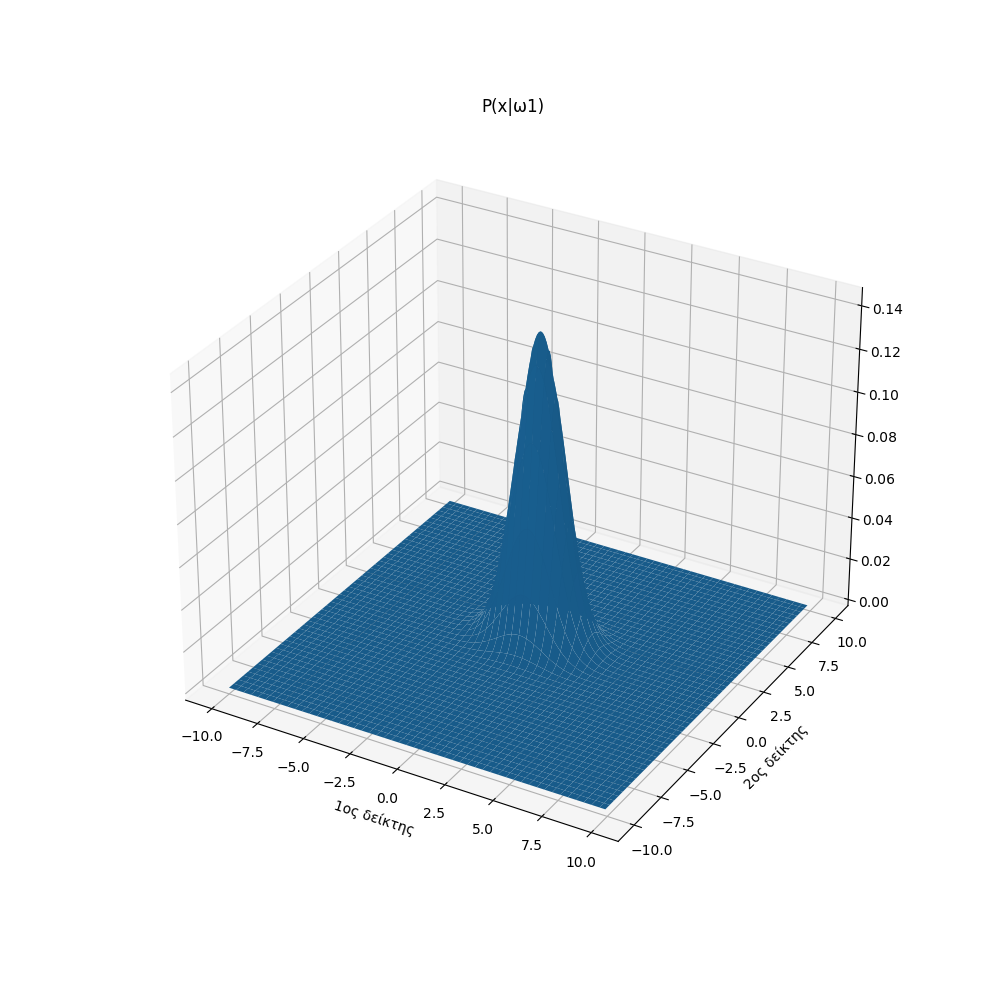

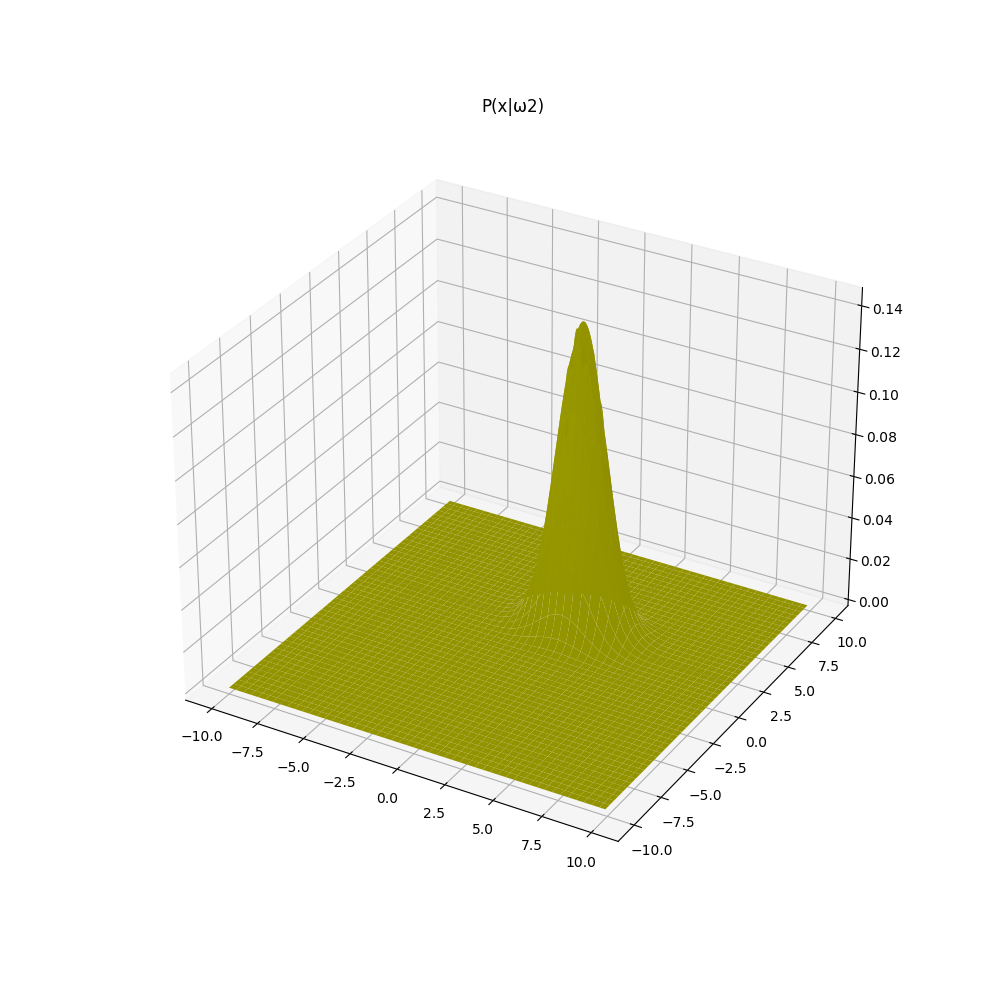

<Figure size 1000x1000 with 0 Axes>

In [1]:
#Χαρτερός Σταμάτιος ΑΕΜ:9516
#ΜΕΡΟΣ Α
#ΕΡΩΤΗΜΑ 1
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy.stats import multivariate_normal
#μεσες τιμες μ1 ,μ2
m1=np.array([0.4,0.8])
m2=np.array([1.5,2.7])
#πινακας συμμεταβλητοτητας
S=np.array([[1.5,0],[0,0.8]])
#a priori πιθανότητες
Pw1=0.95
Pw2=0.05

#Παίρνω τις τίμες των δεικ΄των που θα χρησιμοποιήσω και για τις 2 κατανομες
XX, YY = np.meshgrid(np.arange(-10,10,0.1),np.arange(-10,10,0.1))#τιμες απτο -10 εως το -10 με βημα 0.1
data=np.empty((XX.shape+(2,)))
data[:,:,0]=XX
data[:,:,1]=YY

#Για την κατανομη p(x|ω1)
z1= multivariate_normal.pdf(data,m1,S) #εύρεση των τιμών για την κανονικη κατανομη 2 μεταβλητων
#απεικόνηση της κατανομης p(x|ω1)
fig = plt.figure(figsize=(10,10)) 
ax1 = plt.axes(projection ='3d')
ax1.plot_surface(XX,YY,z1)
ax1.set_title('P(x|ω1)')#τίτλος
ax1.set_xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
ax1.set_ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()#εμ΄φανιση

#Για την κατανομη p(x|ω2)
z2= multivariate_normal.pdf(data,m2,S) #εύρεση των τιμών για την κανονικη κατανομη 2 μεταβλητων
#απεικόνηση τις κατανομής p(x|ω2)
ax2 = plt.axes(projection ='3d')
ax2.plot_surface(XX,YY,z2,color='y')
ax2.set_title('P(x|ω2)')
ax1.set_xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
ax1.set_ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()

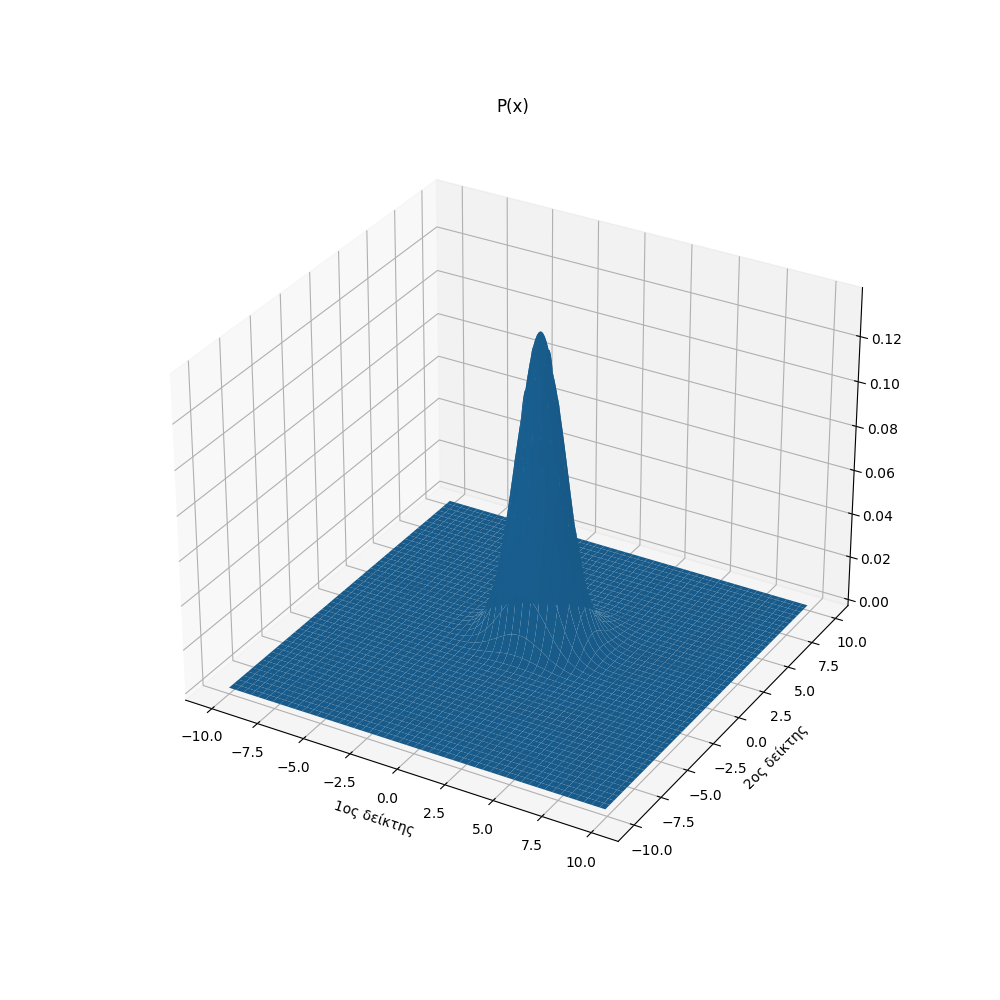

<Figure size 1000x1000 with 0 Axes>

In [2]:
#ΜΕΡΟΣ Α 
#ΕΡΩΤΗΜΑ 2
Px=Pw1*z1+Pw2*z2 #υπολογισμός της ολικής κατανομής
#εμφάνιση της ολικής κατανομής
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_surface(XX,YY,Px)
ax.set_title('P(x)')
plt.xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
plt.ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()

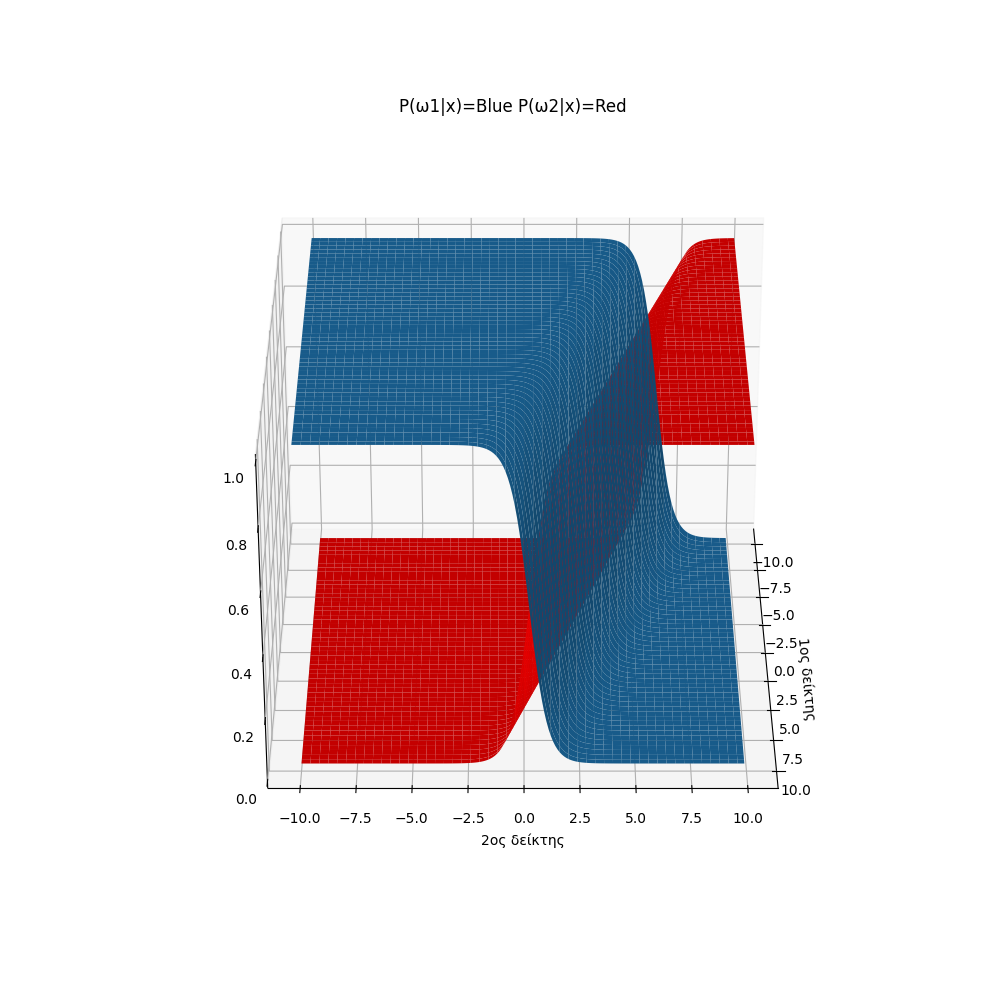

<Figure size 1000x1000 with 0 Axes>

In [3]:
#ΜΕΡΟΣ Α 
#ΕΡΩΤΗΜΑ 3
#υπολογισμός των a posteriori πιθανοτήτων P(ω1|χ) και P(ω2|χ)
Pw1X=(z1*Pw1)/Px
Pw2X=(z2*Pw2)/Px
#εμ΄φανιση των κατανομών στο ίδιο σχήμα ώστε να γίνεται εύκολη σύγκριση
fig = plt.figure(figsize=(10,10))
ax1 = plt.axes(projection ='3d')
ax1.plot_surface(XX,YY,Pw1X)
ax1.plot_surface(XX,YY,Pw2X,color='r')
ax1.set_title('P(ω1|x)=Βlue P(ω2|x)=Red')
ax1.view_init(30, 0)#περιστροφή του σχήματος για καλύτερη εμφάνιση
plt.xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
plt.ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()


In [4]:
#ΜΕΡΟΣ Α 
#ΕΡΩΤΗΜΑ 4
#χρησιμοποιω τον τυπο BayesError=S(P(ω1|χ)*P(x))[οταν επιλεγεται η κλαση ω2 απ'τον ταξινομητη] +S(P(ω2|χ)*P(x))[οταν επιλεγεται η κλαση ω1]
err=np.sum(np.minimum(Pw1X,Pw2X)*Px)*0.01#*0.01 λογω των step που χρησιμοποιησαμε(0.1 για καθε δεικτη)
print("Bayes error is=",err) 

Bayes error is= 0.03463241481243463


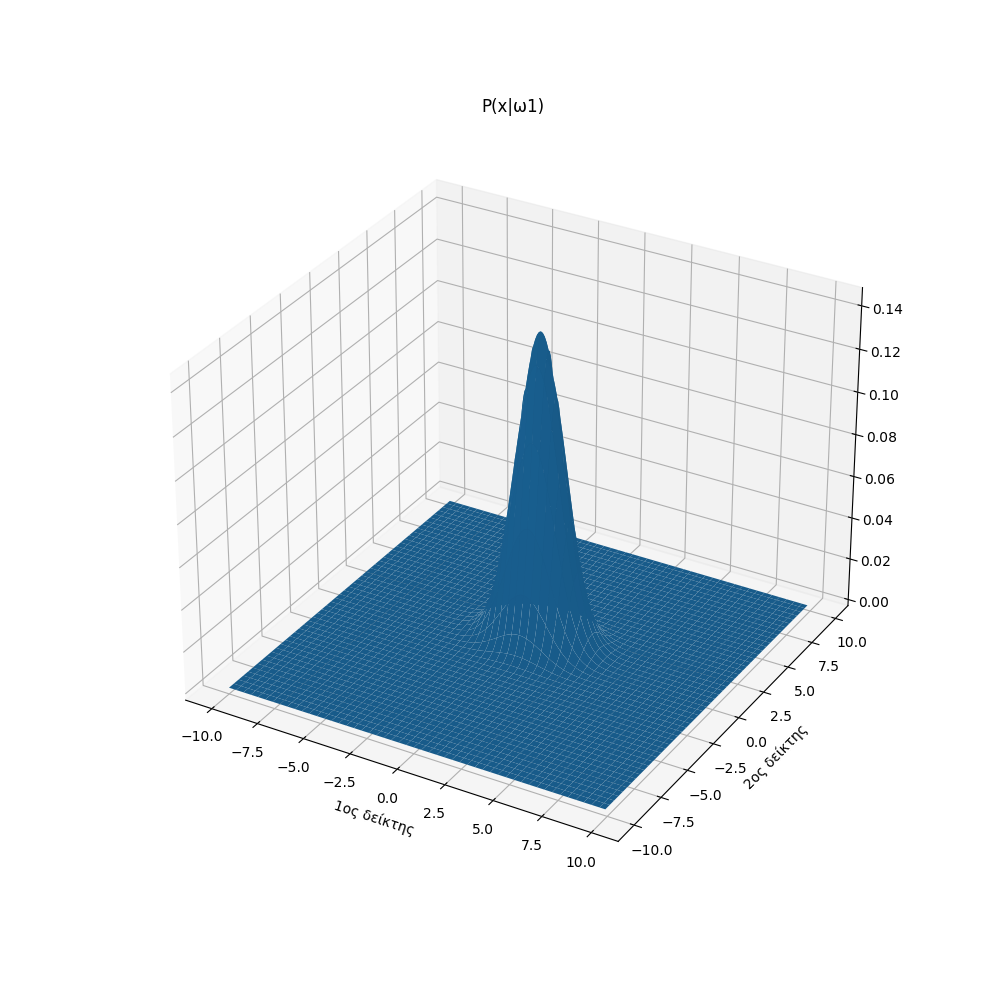

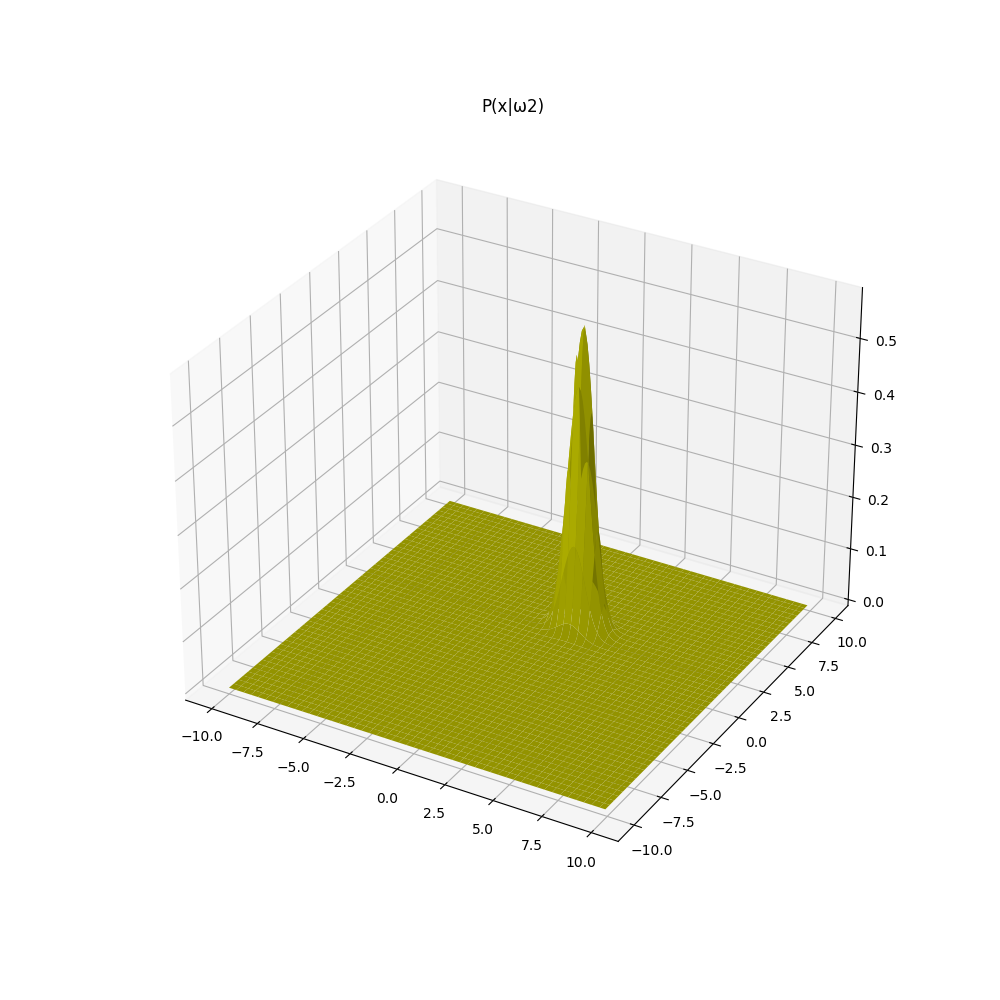

<Figure size 1000x1000 with 0 Axes>

In [5]:
#ΜΕΡΟΣ Β
#ΕΡΩΤΗΜΑ 1
S1=S      #νεοι πινακες συμμεταβλητοτητας
S2=S/4

#Για την κατανομη p(x|ω1)
Z1= multivariate_normal.pdf(data,m1,S1) #εύρεση των τιμών για την κανονικη κατανομη 2 μεταβλητων
#απεικόνηση της κατανομης p(x|ω1)
fig = plt.figure(figsize=(10,10)) 
ax1 = plt.axes(projection ='3d')
ax1.plot_surface(XX,YY,Z1)
ax1.set_title('P(x|ω1)')#τίτλος
ax1.set_xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
ax1.set_ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()#εμ΄φανιση

#Για την κατανομη p(x|ω2)
Z2= multivariate_normal.pdf(data,m2,S2) #εύρεση των τιμών για την κανονικη κατανομη 2 μεταβλητων
#απεικόνηση τις κατανομής p(x|ω2)
ax2 = plt.axes(projection ='3d')
ax2.plot_surface(XX,YY,Z2,color='y')
ax2.set_title('P(x|ω2)')
ax1.set_xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
ax1.set_ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()




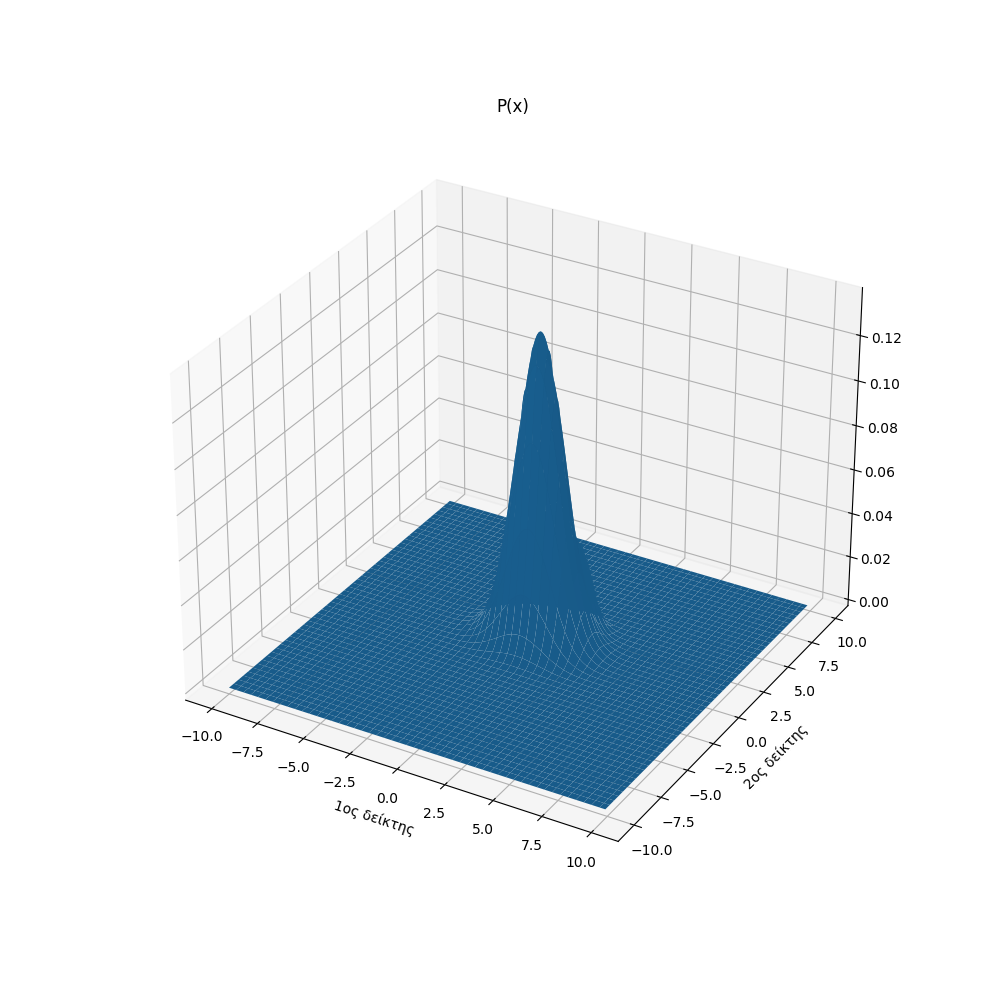

<Figure size 1000x1000 with 0 Axes>

In [6]:
#ΜΕΡΟΣ Β
#ΕΡΩΤΗΜΑ 2
PX=Pw1*Z1+Pw2*Z2 #υπολογισμός της ολικής κατανομής  ,  Z1=P(X|ω1) κτλπ
#εμφάνιση της ολικής κατανομής
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_surface(XX,YY,PX)
ax.set_title('P(x)')


plt.xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
plt.ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()

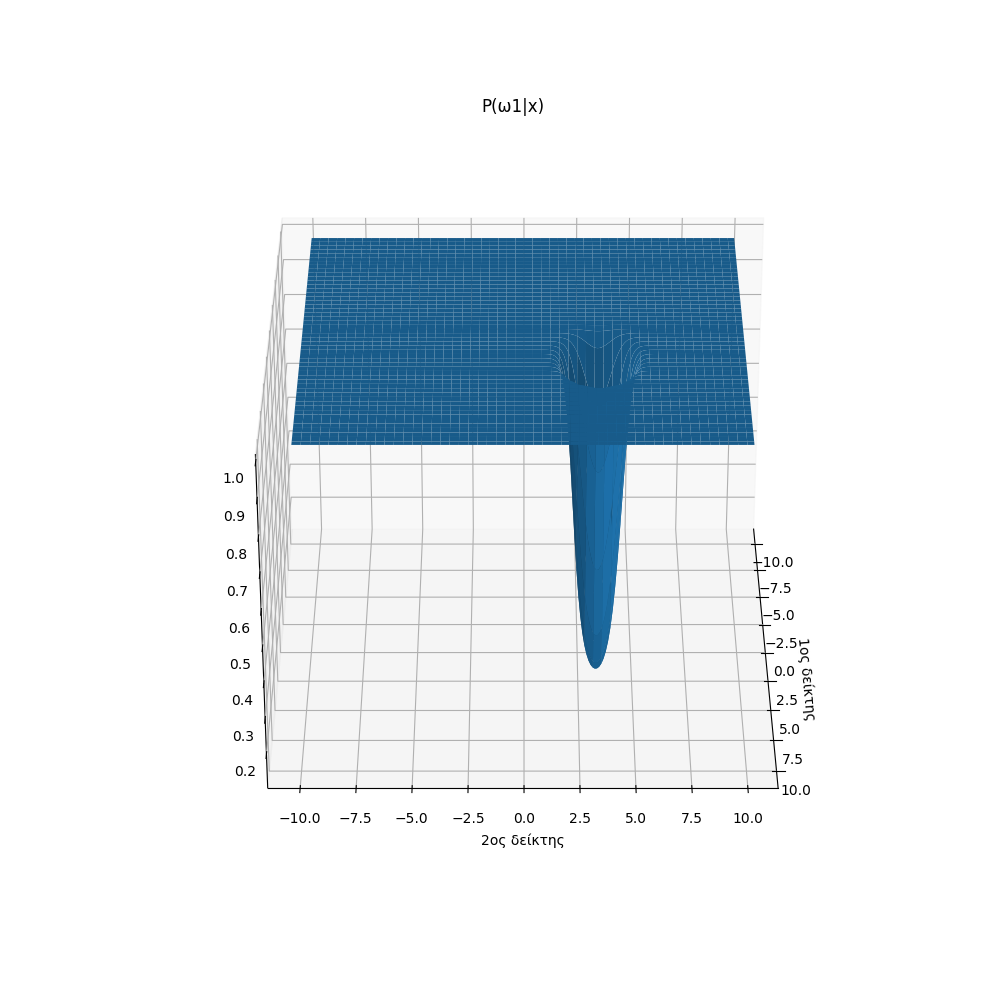

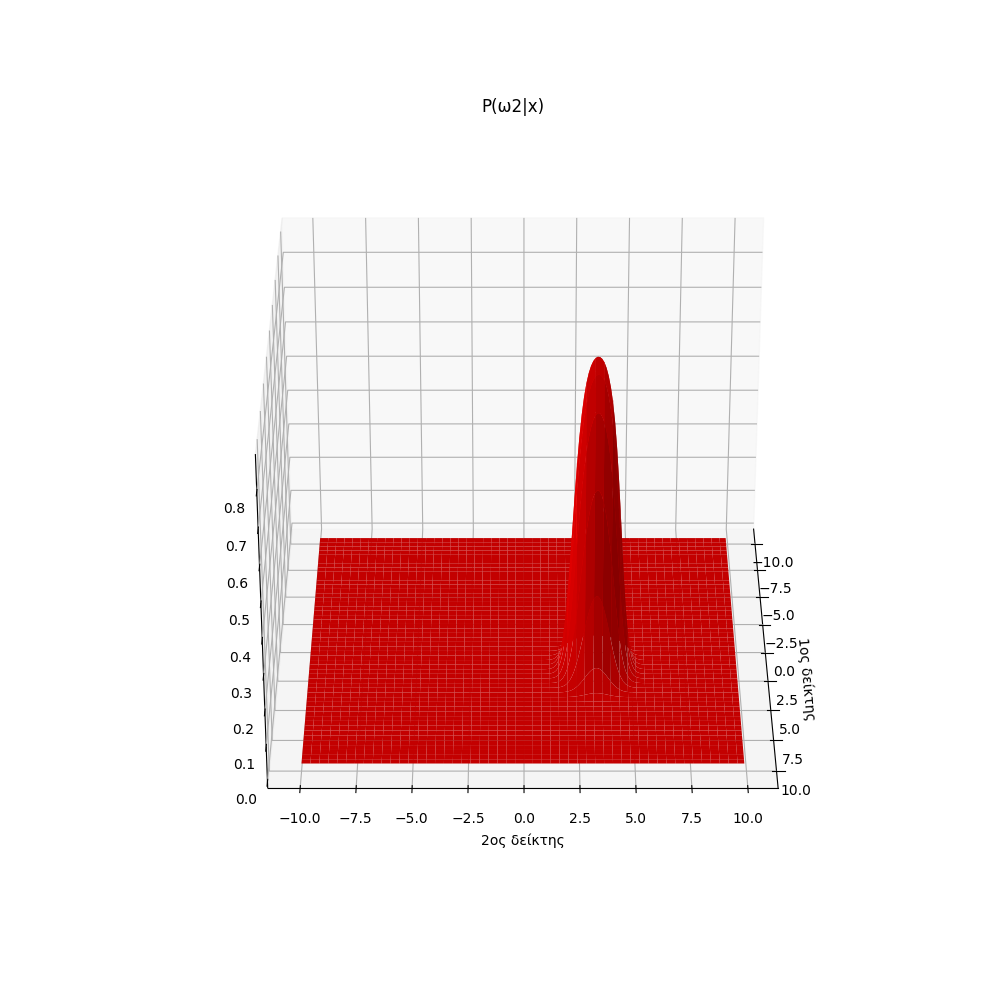

<Figure size 1000x1000 with 0 Axes>

In [7]:
#ΜΕΡΟΣ Β
#ΕΡΩΤΗΜΑ 3
#υπολογισμός των a posteriori πιθανοτήτων P(ω1|χ) και P(ω2|χ)
PW1X=(Z1*Pw1)/PX
PW2X=(Z2*Pw2)/PX

fig = plt.figure(figsize=(10,10))
ax1 = plt.axes(projection ='3d')
ax1.plot_surface(XX,YY,PW1X)
ax1.set_title('P(ω1|x)')
ax1.view_init(30, 0)#περιστροφή του σχήματος για καλύτερη εμφάνιση
plt.xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
plt.ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()

ax2 = plt.axes(projection ='3d')
ax2.plot_surface(XX,YY,PW2X,color='r')#δίνω κόκκινο χρώμα στην P(ω2|χ)
ax2.set_title('P(ω2|x)')
ax2.view_init(30, 0)#περιστροφή του σχήματος για καλύτερη εμφάνιση
plt.xlabel('1ος δείκτης')#δίνω ονομασία στον χ αξονα
plt.ylabel('2ος δείκτης')#δίνω ονομασία στον y αξονα
plt.show()

In [8]:
#ΜΕΡΟΣ Β
#ΕΡΩΤΗΜΑ 4

#χρησιμοποιω τον τυπο BayesError=S(P(ω1|χ)*P(x))[οταν επιλεγεται το ω2] +S(P(ω2|χ)*P(x))[οταν επιλεγεται το ω1] 
err=np.sum(np.minimum(PW1X,PW2X)*PX)*0.01#*0.01 λογω των step που χρησιμοποιησαμε(0.1 για καθε δεικτη)

print("bayes error is=",err) 
print("Παρατηρουμε ότι το σφαλμα μπαγιες ειναι μικροτερο στην 2η περιπτωση πράγμα που βγάζει νοημα καθως αν συγκρινουμε τα σχηματα\nτων ερωτηματων Α1 και Β1 βλεπουμε οτι στην 2η περιπτωση οι τιμες των δεικτων που υποδηλωνουν καρκινο η μη διαφερουν περισσοτερο μεταξυ τους σε συγκριση\nμε την 1η περιπτωση")

bayes error is= 0.029034273140941133
Παρατηρουμε ότι το σφαλμα μπαγιες ειναι μικροτερο στην 2η περιπτωση πράγμα που βγάζει νοημα καθως αν συγκρινουμε τα σχηματα
των ερωτηματων Α1 και Β1 βλεπουμε οτι στην 2η περιπτωση οι τιμες των δεικτων που υποδηλωνουν καρκινο η μη διαφερουν περισσοτερο μεταξυ τους σε συγκριση
με την 1η περιπτωση
